In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
from numpy.linalg import *
%matplotlib inline

In [16]:
data = pd.read_csv('Cars93.csv')
data

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


[[-6.86428214e-17]
 [ 6.50764131e-01]] 0.005884473731105209


Text(0.5, 0, 'Horsepower')

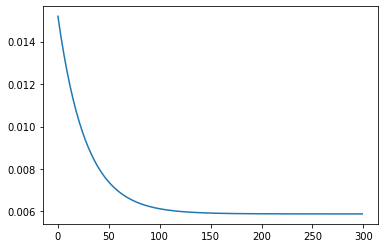

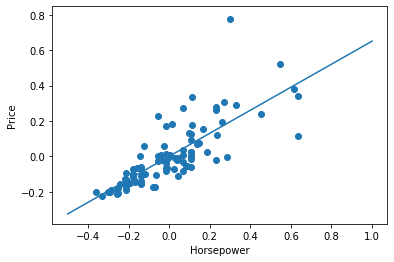

In [3]:
HP = np.array(data['Horsepower']).reshape(93,1)
HP = (HP-HP.mean())/(HP.max()-HP.min())
HP = np.insert(HP,0,1,axis=1)

price = np.array(data['Price']).reshape(93,1)
price = (price-price.mean())/(price.max()-price.min())
theta = np.zeros(2).reshape(2,1)
N = 300
J = []
L = 0.4

def cost(hp,p,theta):
    return sum((hp.dot(theta) - price)**2)/(2*len(p))

for i in range(N):
    theta = theta - (L/len(price))*np.matmul(HP.T,(HP.dot(theta)-price))
    J.append(cost(HP,price,theta))

plt.plot(np.arange(N),J)
plt.figure()
plt.scatter(HP.T[1], price)
m = np.linspace(-0.5,1,100)
print(theta, J[-1])
plt.plot(m,theta[0]+theta[1]*m)
plt.ylabel('Price')
plt.xlabel('Horsepower')

[[-0.61942793 -0.78505353]
 [-0.78505353  0.61942793]]


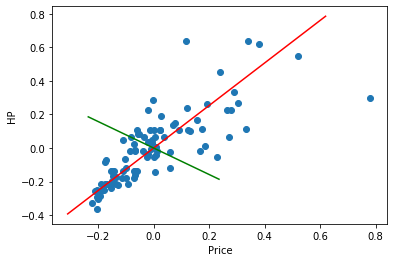

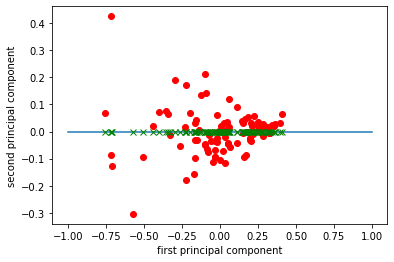

In [47]:
HP = np.array(data['Horsepower']).reshape(93,1)
HP = (HP-HP.mean())/(HP.max()-HP.min())
price = np.array(data['Price']).reshape(93,1)
price = (price-price.mean())/(price.max()-price.min())
X = np.column_stack((price,HP))
Sigma = cov(X.T)
u,s,v= svd(Sigma)
ured = u[0]
print(u)

z1 = ured[1]*(HP-np.mean(HP))+ured[0]*(price-np.mean(price)) #first principal component

z2 = ured[0]*(HP-np.mean(HP))- ured[1]*(price-np.mean(price)) #second principal component



plt.figure()
plt.scatter(price,HP)
plt.plot([ured[0]*0.5,-ured[0]], [ured[1]*0.5,-ured[1]],'r')
plt.plot([-u[1][0]*0.3,u[1][0]*0.3], [-u[1][1]*0.3,u[1][1]*0.3],'g')
plt.xlabel('Price')
plt.ylabel('HP')
plt.savefig('primera.png')

plt.figure()
plt.plot(z1,z2,'ro')
plt.plot(np.linspace(-1,1,100),np.zeros(100))
plt.plot(z1,np.zeros(len(z1)),'gx')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.savefig('segunda.png')

In [ ]:
x = linspace(0,350,1000)
print(x.shape,ured.shape)
y = lambda x: X[0] + x*ured
m=[y(i) for i in np.arange(len(x))]
print(y(1))

plt.plot(np.linspace(-310,-50,100),np.zeros(100),'r')
plt.scatter(z,np.zeros(len(z)))

plt.xlabel('Z_1')


plt.quiver(X[0][0],X[0][1],u[0][0],u[0][1])

#plt.scatter(x,m)

In [ ]:
[[-0.98933502 -0.14565786]
 [ 0.14565786 -0.98933502]]

In [40]:
(1/len(price))*X.T.dot(X)

array([[0.03107526, 0.0295433 ],
       [0.0295433 , 0.04520755]])

In [46]:
a=array([90,80,70]).reshape(3,1)
a.shape
a

array([[90],
       [80],
       [70]])